Step 1: Import Libraries and Load Dataset

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Data Cleaning & Feature Selection

In [14]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Drop rows with missing values in selected features
df = df[features + [target]].dropna()

# Encode categorical variables 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C':1, 'Q': 2})

# Define features and label
x = df[features]
y = df[target]

Step 3: Split the Dataset

In [15]:
# Train:Dev:Test = 60:20:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

Step 4: Train Decision Tree Without Restriction

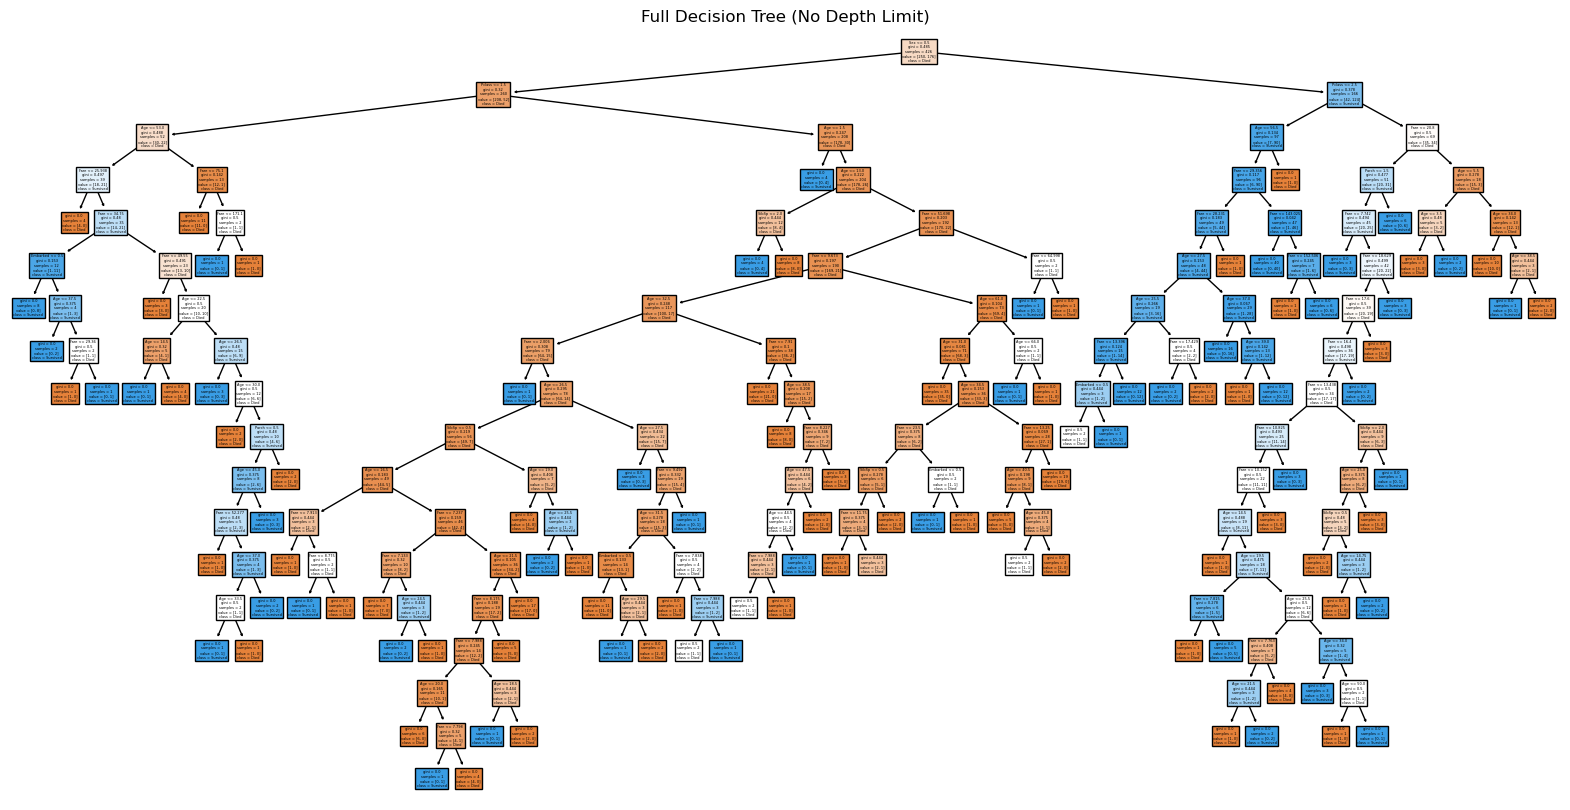

Dev Accuracy (no depth limit): 0.769


In [16]:
# Train Full tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(x_train, y_train)

# Plot the full tree
plt.figure(figsize=(20,10))
plot_tree(clf_full, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.title("Full Decision Tree (No Depth Limit)")
plt.show()

# Accuracy on dev set
dev_acc_full = accuracy_score(y_dev, clf_full.predict(x_dev))
print("Dev Accuracy (no depth limit):", round(dev_acc_full, 3))

Step 5: Train Trees with Varying Depth (2-10)

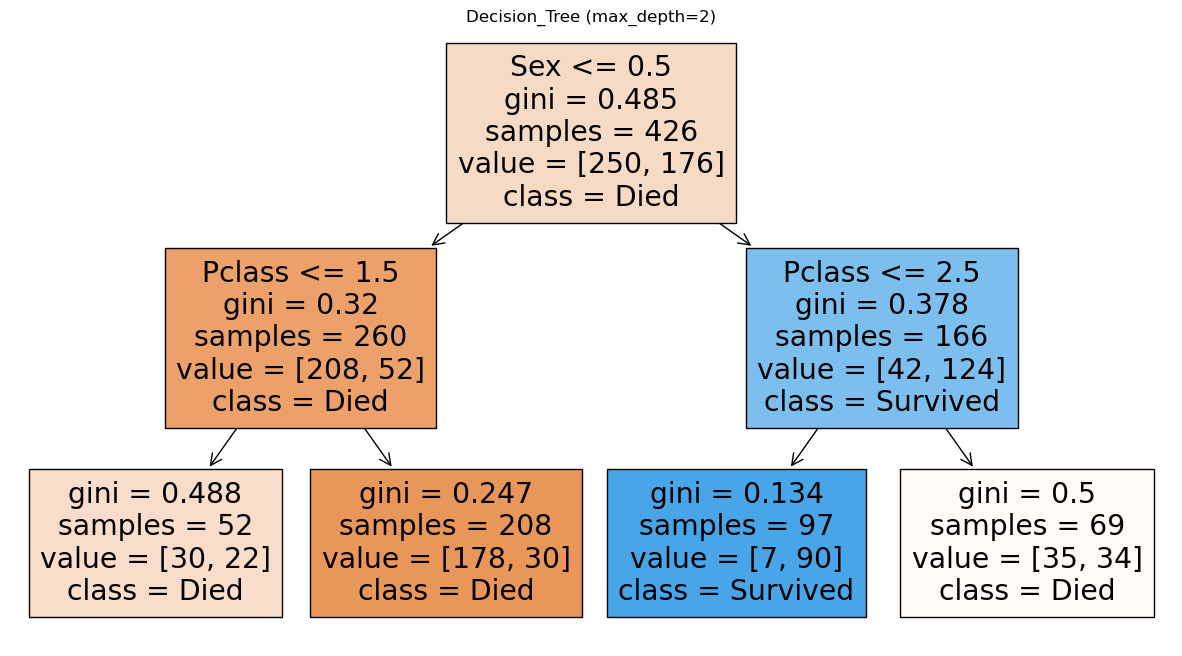

Depth: 2 | Train accuracy: 0.782 | Dev Accuracy: 0.86


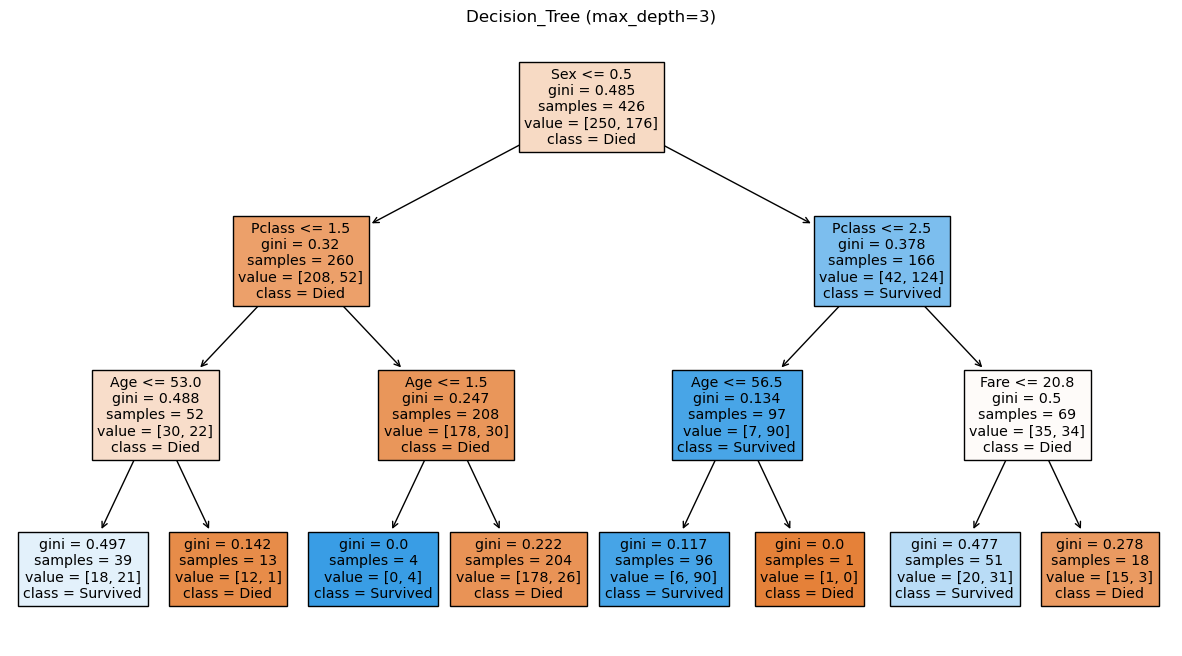

Depth: 3 | Train accuracy: 0.826 | Dev Accuracy: 0.79


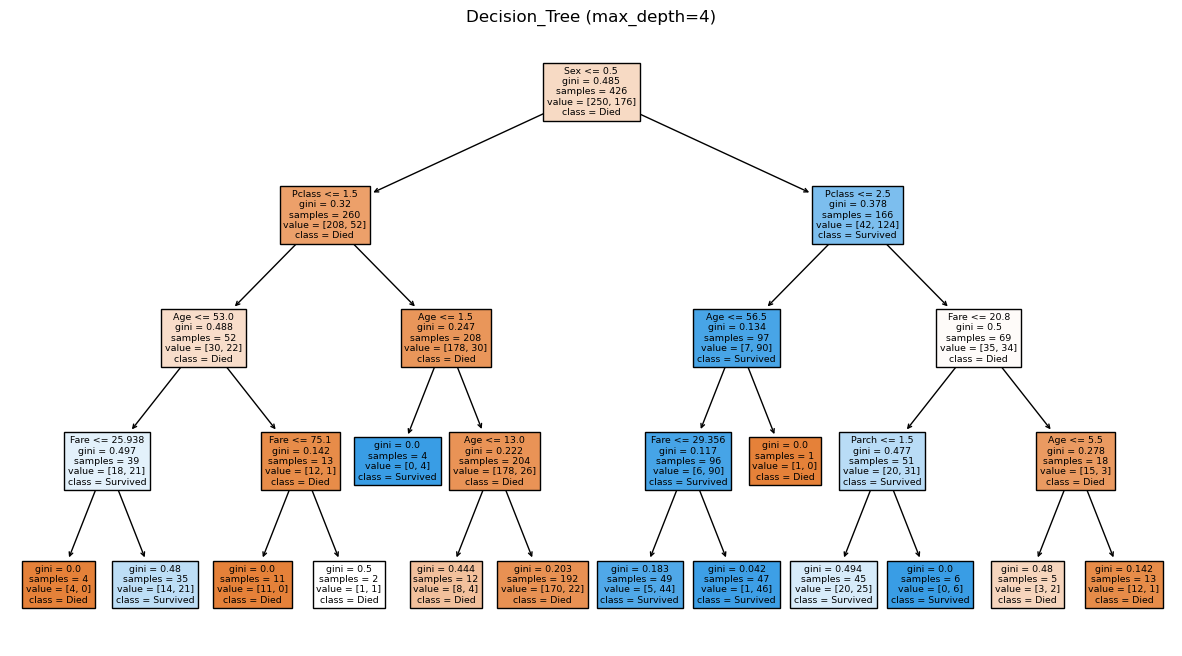

Depth: 4 | Train accuracy: 0.836 | Dev Accuracy: 0.797


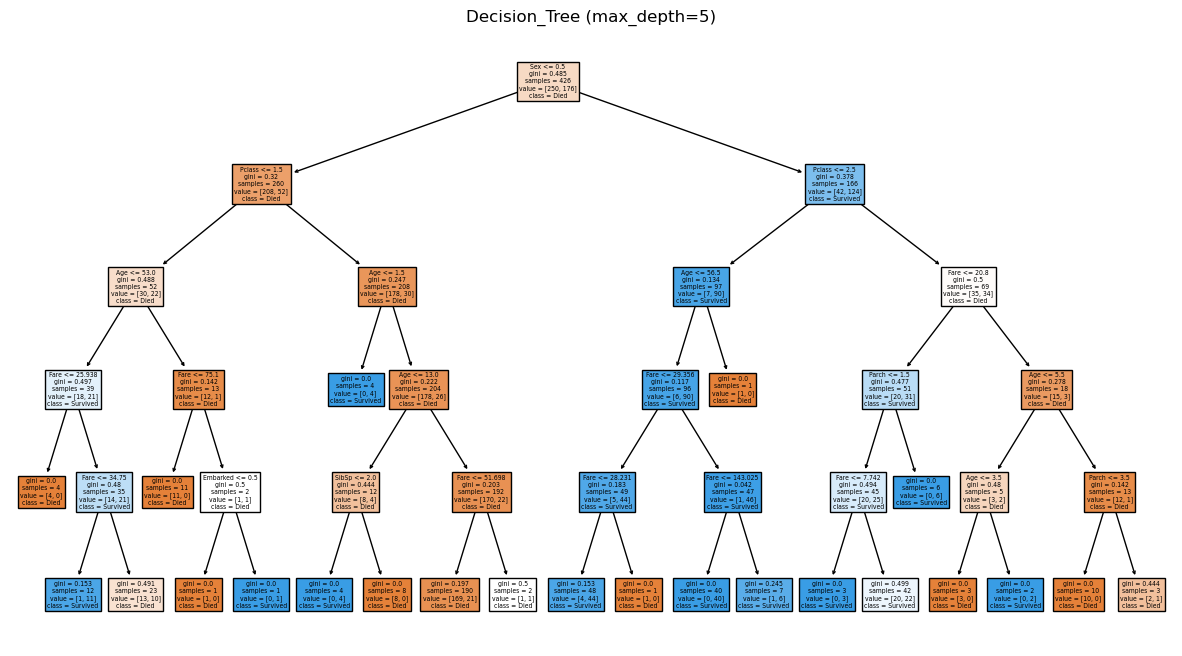

Depth: 5 | Train accuracy: 0.862 | Dev Accuracy: 0.839


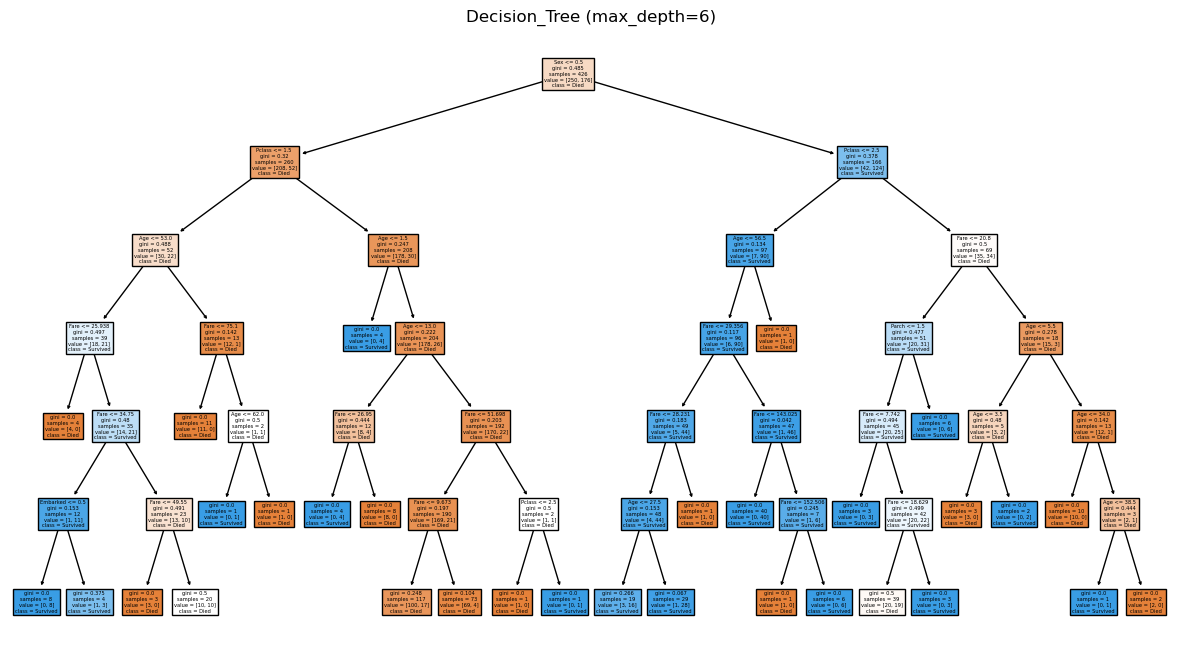

Depth: 6 | Train accuracy: 0.871 | Dev Accuracy: 0.867


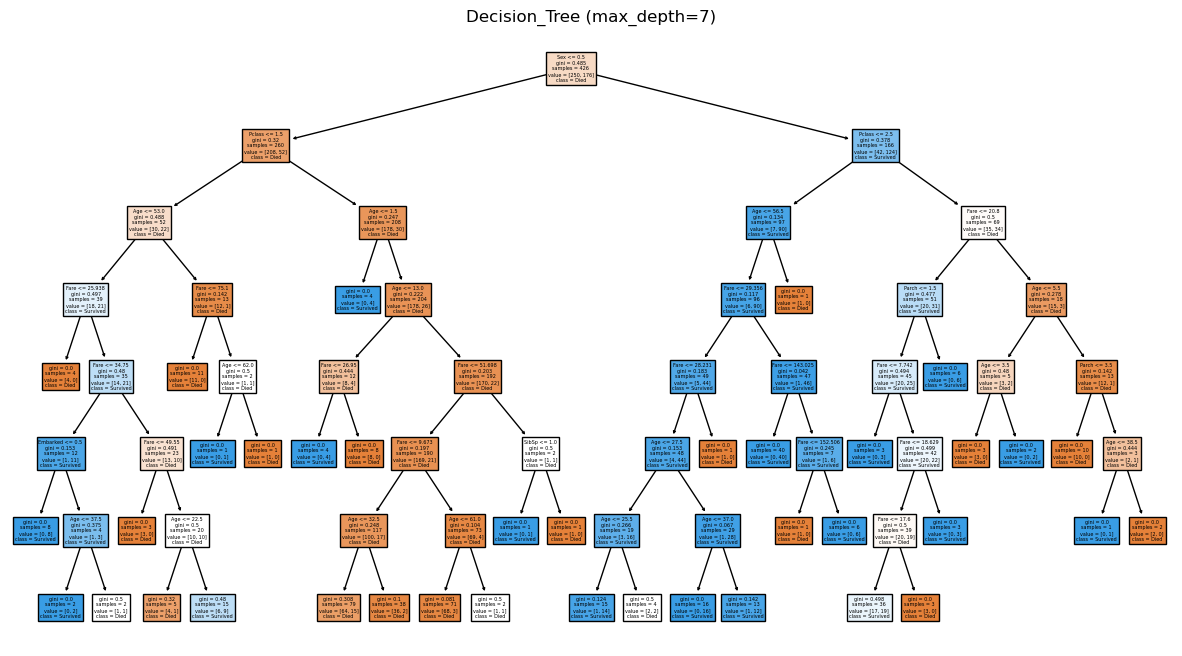

Depth: 7 | Train accuracy: 0.883 | Dev Accuracy: 0.769


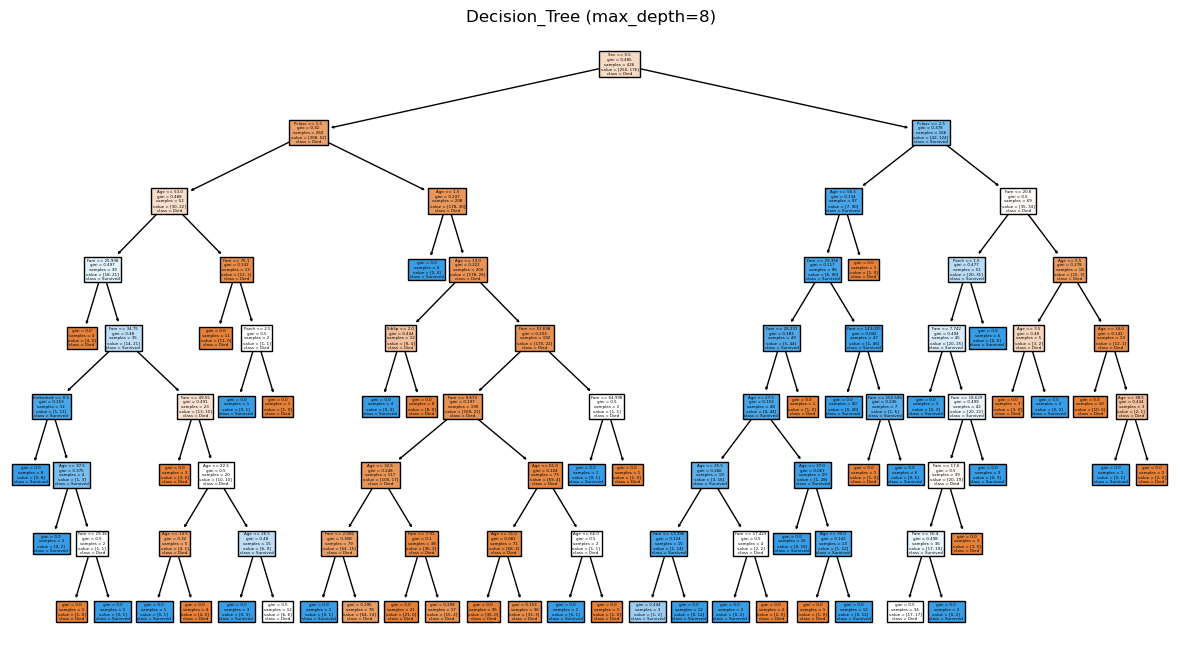

Depth: 8 | Train accuracy: 0.899 | Dev Accuracy: 0.853


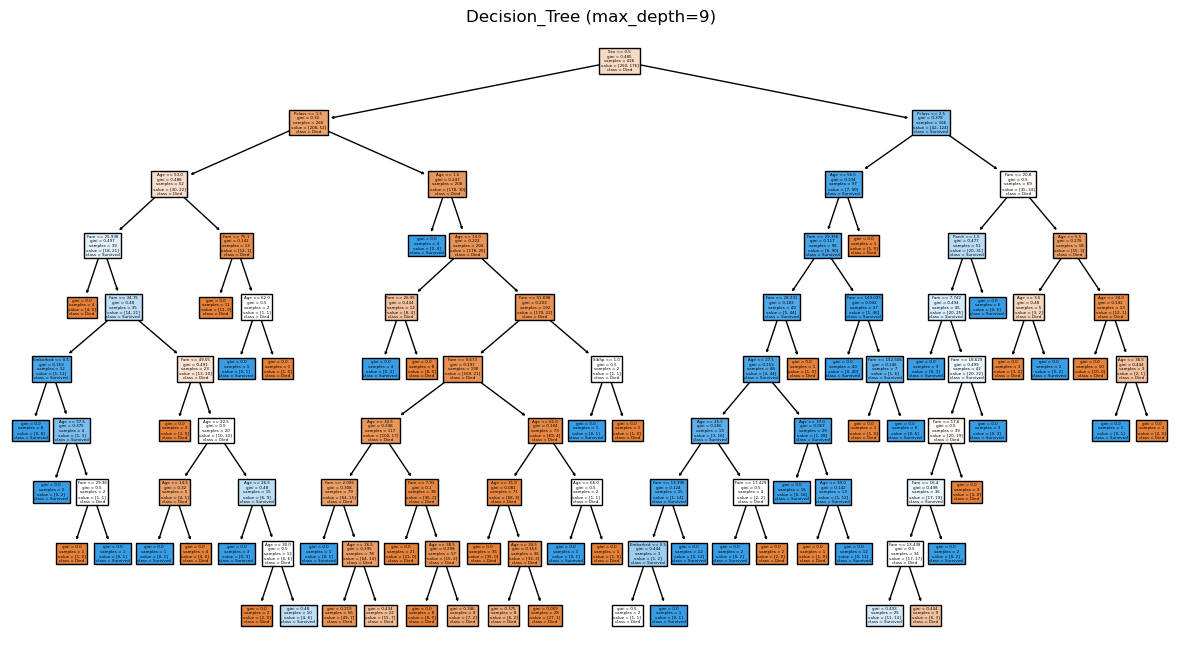

Depth: 9 | Train accuracy: 0.911 | Dev Accuracy: 0.755


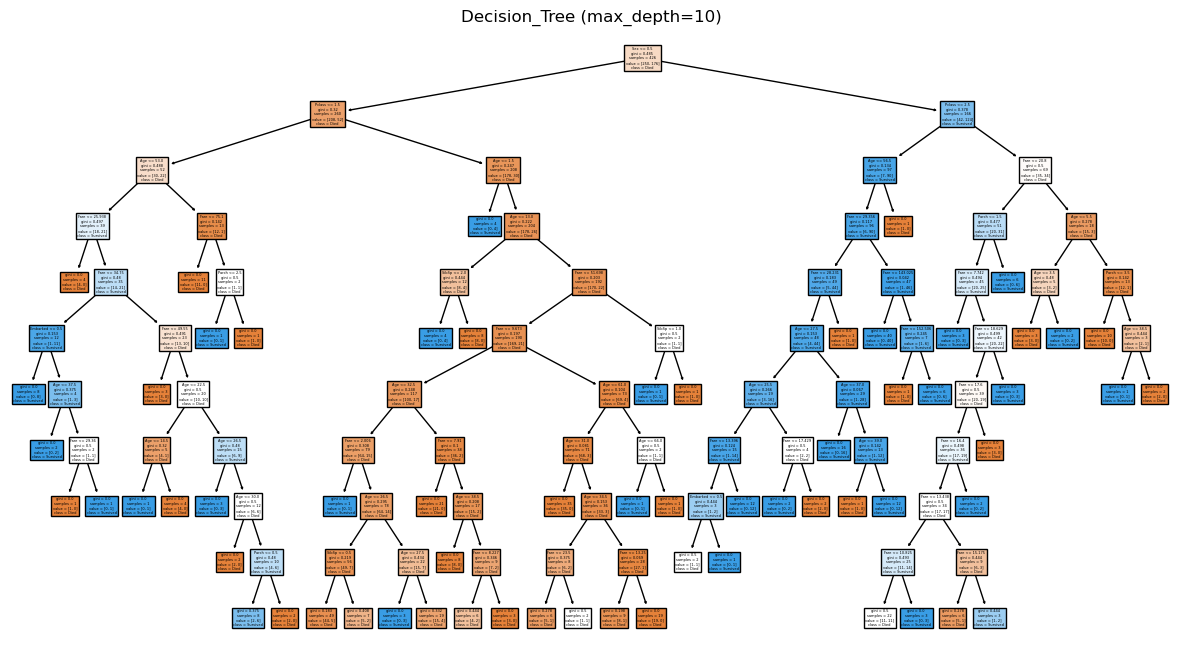

Depth: 10 | Train accuracy: 0.925 | Dev Accuracy: 0.811


In [17]:
train_accuracies = []
dev_accuracies = []

for depth in range (2, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(x_train, y_train)

    # Accuracies
    train_acc = accuracy_score(y_train, clf.predict(x_train))
    dev_acc = accuracy_score(y_dev, clf.predict(x_dev))

    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)

    # Plot tree
    plt.figure(figsize=(15, 8))
    plot_tree(clf, feature_names=features, class_names= ['Died', 'Survived'], filled=True)
    plt.title(f'Decision_Tree (max_depth={depth})')
    plt.show()

    print(f'Depth: {depth} | Train accuracy: {round(train_acc, 3)} | Dev Accuracy: {round(dev_acc, 3)}')

Step 6: Plot Accuracy Curves

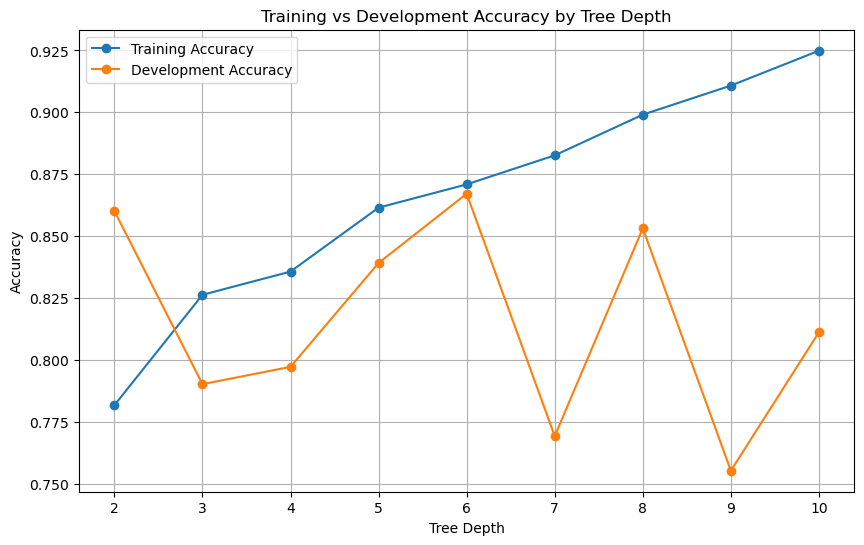

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(2, 11), dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Development Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

Comment on Shape:
The training accuracy increases with depth and reaches 100%, indicating overfitting. The development accuracy peaks around a certain depth (often around 3-5) and then declines, showing the bias-variance tradeoff.

Step 7: Final Model Evalaution on Test Set

In [19]:
# Choose best depth based on dev accuracy
best_depth = np.argmax(dev_accuracies) + 2
print("Best depth:", best_depth)

# Retrain on combined train+dev
x_final = pd.concat([x_train, x_dev])
y_final = pd.concat([y_train, y_dev])

clf_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_final.fit(x_final, y_final)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, clf_final.predict(x_test))
print("Final Test Accuracy:", round(test_accuracy, 3))

Best depth: 6
Final Test Accuracy: 0.769
